In [3]:
from Levenshtein import distance
import json
import numpy as np
np.set_printoptions(edgeitems=6, linewidth=160)
import re

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from scipy.spatial.distance import squareform

In [ ]:
stopnames = []
for r in sorted(result.keys()):
    for disp in result[r]:
        for division in disp['disposition']:
            for stop in division['stoplist']:
                stopnames.append(stop['stopname'])

In [4]:
with open('../data/dispositions/stopnames.json', 'r') as f_in:
    stopnames = json.load(f_in)

In [5]:
#remove B / D
stopnames = [re.sub(r' B\s*$| D\s*$| B/D\s*$| Dd\s*$| d\s*$','',stop.strip()).strip() for stop in stopnames]
#remove anything between () and []
stopnames = [re.sub(r'\(.*?\)|\[.*?\]','',stop.strip()).strip() for stop in stopnames]

In [6]:
#only keep uniq
stopnames = sorted(list(set(stopnames)))

In [7]:
#throw out entries of length 0
stopnames = [stopname for stopname in stopnames if len(stopname) > 0]

In [8]:
stopcount = len(stopnames)

In [9]:
distmat = np.zeros((stopcount, stopcount))

In [10]:
lengths = np.array([[len(stopname) for stopname in stopnames]])

In [11]:
minlengths = np.minimum(lengths.T, lengths)

In [12]:
normalization = lengths.T + lengths

In [13]:
normalization

array([[16, 15, 15, 10, 18, 15, ..., 20, 19, 17, 14, 29, 11],
       [15, 14, 14,  9, 17, 14, ..., 19, 18, 16, 13, 28, 10],
       [15, 14, 14,  9, 17, 14, ..., 19, 18, 16, 13, 28, 10],
       [10,  9,  9,  4, 12,  9, ..., 14, 13, 11,  8, 23,  5],
       [18, 17, 17, 12, 20, 17, ..., 22, 21, 19, 16, 31, 13],
       [15, 14, 14,  9, 17, 14, ..., 19, 18, 16, 13, 28, 10],
       ...,
       [20, 19, 19, 14, 22, 19, ..., 24, 23, 21, 18, 33, 15],
       [19, 18, 18, 13, 21, 18, ..., 23, 22, 20, 17, 32, 14],
       [17, 16, 16, 11, 19, 16, ..., 21, 20, 18, 15, 30, 12],
       [14, 13, 13,  8, 16, 13, ..., 18, 17, 15, 12, 27,  9],
       [29, 28, 28, 23, 31, 28, ..., 33, 32, 30, 27, 42, 24],
       [11, 10, 10,  5, 13, 10, ..., 15, 14, 12,  9, 24,  6]])

In [14]:
for i in range(len(stopnames)):
    if i%100 == 0:
        print (i, end=' ')
    for j in range(len(stopnames)):
        distmat[i,j] = distance(stopnames[i], stopnames[j])

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 

normalized edit distance:

https://stackoverflow.com/questions/45783385/normalizing-the-edit-distance

http://www.cse.lehigh.edu/%7Elopresti/Publications/1996/sdair96.pdf

In [15]:
normalized_distmat = distmat / normalization

In [16]:
condensed_normalized_distmat = squareform(normalized_distmat)

In [17]:
Z = linkage(condensed_normalized_distmat, method='average')

In [18]:
for i in leaves_list(Z):
    print(stopnames[i])

………
A.
B.
Dulciaan waarvoor het regeerwerk is aangebragt
Zinck
Zink
Cinck
Cincq
Cink
Cinq
Cello
Nihil
Pikelo
Picollo
Piccolo
Picolo
Vool
Fiool
Viool
Fiol
Fiola
Viola
Fifteenth
Glockenton
Open
Ripiëno
Repieno
Ripieno
Sexq
Muette
Musette
Monter
Montre
Ventil
ventil
Septiem
Septième
Tierce
Tiers
Tersi
Terz
Terts
Tertz
Prest
Praest
Praestt
Serpent
Terzet
Schwiegel
Zwegel
Ranket
Sifflet
Sufflet
Suflet
Siflet
Suiflet
Saliset
Salicet
Salicete
Salicett
Scharf
Scharff
Scharp
Scherp
Staalspel
Chalumeau
Skalmej
Skalmeje
Schalmey
Schalmy
Schalmij
Schalmei
Schalmeij
Pastorel
Pastorita
Major
Major Bas
Majorbas
Nasat
Nasart
Nasaat
Nasaet
Nassat
Nassard
Nassart
Nasard
Nazaard
Nazard
Vazart
Nazat
Nazart
Nazatt
Fiffaro
Fugara
Figard
Figaro
Fama
Gamb
Gamba
Gambe
Soubasse
Soubbasse
Sousbasse
Soubas
Subas
Subass
Sub Bass
Subbas
Sub-bass
Subbass
Jubal
Tuba
Simbal
Simbel
Cymbel
Cimbel
Zimbel
Cimballe
Cymballe
Cymbaal
Cymbal
Cymbale
Cumbal
Cimbal
Cimbaal
Cimbael
Régale
Regal
Regaal
Regael
Manuaal
Pedaal
Coraa

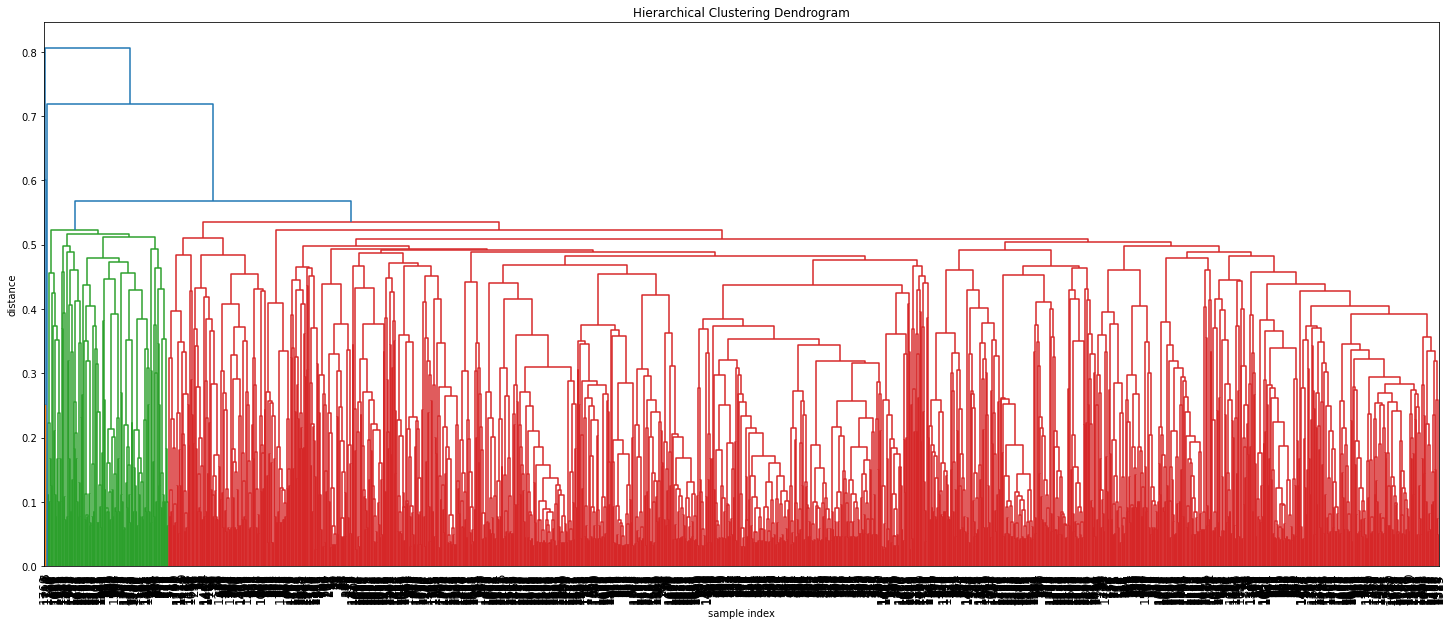

In [19]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
H = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()

In [20]:
import pandas as pd
import disamby.preprocessors as pre
from disamby import Disamby

In [21]:
df = pd.DataFrame({
    'name': stopnames
})

In [22]:
pipeline = [
    pre.normalize_whitespace,
    pre.remove_punctuation,
    lambda x: pre.trigram(x) + pre.split_words(x)
]

In [23]:
dis = Disamby(df, pipeline)

In [26]:
stopname_sets = dis.disambiguated_sets(threshold=0.35)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1761/1761 [00:03<00:00, 585.09it/s]


In [27]:
for s in stopname_sets:
    print("\n--------------------\n")
    for ix in list(s):
        print(stopnames[ix])


--------------------

Fluit Harmonie
Fluit harmonie

--------------------

Harmoniefluit

--------------------

Basson-Trompet

--------------------

Echotrompet
Echo-Trompet
Echo-trompet
Echo-Trompete

--------------------

Flauto portunale

--------------------

Echo Prestant

--------------------

Echo Fluit
Echo fluit

--------------------

Echo Gamba

--------------------

Bazuyn

--------------------

Bazuijn

--------------------

Bas Bazuin
Echo Bazuin
Bazuin

--------------------

Solo trompet

--------------------

Echo Viola
Echo Voxh.

--------------------

Simbal of Scherp

--------------------

Tertsscherp

--------------------

Zwitsersepijp

--------------------

Zwitsersche pijp
Zwitserse pijp
Zwitscherse Pijp

--------------------

Scherp
Groot Scherp
Klein Scherp

--------------------

Groot Cornet

--------------------

Ped Mixtuur

--------------------

Viole major

--------------------

Tibia major

--------------------

Coppel Minor

--------------------

Quinta